# Importing all the necessary Libraries

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import warnings
import seaborn as sns
import matplotlib as plt
#warnings.simplefilter(action='ignore',category=UnstableAPIWarning)
warnings.filterwarnings("ignore")
%matplotlib inline

# As we have to create data we use Datareader from pandas for same.The time duration used are from 2006-2016.

In [14]:
startDate = datetime.datetime(2006,1,1)
endDate = datetime.datetime(2016,1,1)
GS = data.DataReader("GS",'yahoo',startDate,endDate)
MS = data.DataReader("MS",'yahoo',startDate,endDate)
BAC = data.DataReader("BAC",'yahoo',startDate,endDate)
C = data.DataReader("C",'yahoo',startDate,endDate)
#JMC = data.DataReader("JMC",'yahoo',startDate,endDate)
WFC = data.DataReader("WFC",'yahoo',startDate,endDate)

# For some reason we are not able to get data for JPMorgan Chase.We will get back to it latter.

# Running some basic commands

In [15]:
GS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


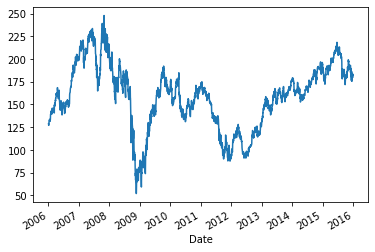

In [16]:
GS['Close'].plot()

# Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [42]:
# Abrevations used 
GS = Goldman Sachs
MS = Morgan Stanley
BAC = Bank of America
C = Citigroup
WFC = Wells Fargo

SyntaxError: invalid syntax (<ipython-input-42-6a989b7ee542>, line 2)

In [17]:
tickers = ["GS","MS","BAC","C","WFC"]

# Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on

In [18]:
bank_stocks = pd.concat([GS,MS,BAC,C,WFC],keys=tickers,axis=1)
bank_stocks.head()

GS                                                 \
                  High         Low        Open       Close     Volume   
Date                                                                    
2006-01-03  129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04  128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05  127.320000  125.610001  126.000000  127.040001  3717400.0   
2006-01-06  129.250000  127.290001  127.290001  128.839996  4319600.0   
2006-01-09  130.619995  128.000000  128.500000  130.389999  4723500.0   

                               MS                                   ...  \
             Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2006-01-03  105.687309  58.490002  56.740002  57.169998  58.310001  ...   
2006-01-04  104.227493  59.279999  58.349998  58.700001  58.349998  ...   
2006-01-05  104.186478  58.590000  58.020000  58.549999  58.509998  ...   
2006-01-06  105.662666  58.849998  58.049999  58.770000  58.570000  ...   
2006-01-09  106.933891  59.290001  58.619999  58.630001  59.189999  ...   

                     C                                           WFC  \
                  Open       Close     Volume   Adj Close       High   
Date                                                                   
2006-01-03  490.000000  492.899994  1537600.0  379.511047  31.975000   
2006-01-04  488.600006  483.799988  1870900.0  372.504486  31.820000   
2006-01-05  484.399994  486.200012  1143100.0  374.352448  31.555000   
2006-01-06  488.799988  486.200012  1370200.0  374.352448  31.775000   
2006-01-09  486.000000  483.899994  1680700.0  372.581421  31.825001   

                                                                    
                  Low       Open      Close      Volume  Adj Close  
Date                                                                
2006-01-03  31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04  31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05  31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06  31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09  31.555000  31.674999  31.674999   5619600.0  20.577309  

[5 rows x 30 columns]

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [20]:
bank_stocks.head()

Bank Ticker          GS                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2006-01-03   129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04   128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05   127.320000  125.610001  126.000000  127.040001  3717400.0   
2006-01-06   129.250000  127.290001  127.290001  128.839996  4319600.0   
2006-01-09   130.619995  128.000000  128.500000  130.389999  4723500.0   

Bank Ticker                     MS                                   ...  \
Stock Info    Adj Close       High        Low       Open      Close  ...   
Date                                                                 ...   
2006-01-03   105.687309  58.490002  56.740002  57.169998  58.310001  ...   
2006-01-04   104.227493  59.279999  58.349998  58.700001  58.349998  ...   
2006-01-05   104.186478  58.590000  58.020000  58.549999  58.509998  ...   
2006-01-06   105.662666  58.849998  58.049999  58.770000  58.570000  ...   
2006-01-09   106.933891  59.290001  58.619999  58.630001  59.189999  ...   

Bank Ticker           C                                           WFC  \
Stock Info         Open       Close     Volume   Adj Close       High   
Date                                                                    
2006-01-03   490.000000  492.899994  1537600.0  379.511047  31.975000   
2006-01-04   488.600006  483.799988  1870900.0  372.504486  31.820000   
2006-01-05   484.399994  486.200012  1143100.0  374.352448  31.555000   
2006-01-06   488.799988  486.200012  1370200.0  374.352448  31.775000   
2006-01-09   486.000000  483.899994  1680700.0  372.581421  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.577309  

[5 rows x 30 columns]

# What is the max Close price for each bank's stock throughout the time period?

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
GS     247.919998
MS      89.300003
BAC     54.900002
C      564.099976
WFC     58.520000
dtype: float64

# pd.xs function get the cross section data from data frame.It take key argument to select data at a particular level.

# Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by 

In [22]:
returns = pd.DataFrame()

In [11]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

# Use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [23]:
for bank in tickers:
    returns[bank + "return"]=bank_stocks[bank]["Close"].pct_change()

# pct_change function will give the percentage change in current and previous element.This will be useful to calculate percentage change in different elements of dataframe.

In [24]:
returns.tail(50)

,GSreturn,MSreturn,BACreturn,Creturn,WFCreturn
Date,,,,,
2015-10-21,-0.031319,-0.023876,-0.018519,-0.019493,0.000754
2015-10-22,0.021480,0.027637,0.016352,0.013511,0.017696
2015-10-23,0.010569,0.008346,0.022277,0.021520,0.012764
2015-10-26,0.008140,-0.002146,-0.000605,-0.009881,-0.008402
2015-10-27,-0.003743,-0.009831,-0.006663,-0.009414,-0.003131
2015-10-28,0.026891,0.037543,0.053659,0.040297,0.024575
2015-10-29,-0.007474,0.002990,-0.010995,-0.019551,-0.006492
2015-10-30,-0.012586,-0.016995,-0.018139,-0.009132,-0.017245
2015-11-02,0.011627,0.015469,0.016686,0.012413,0.013114


# Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

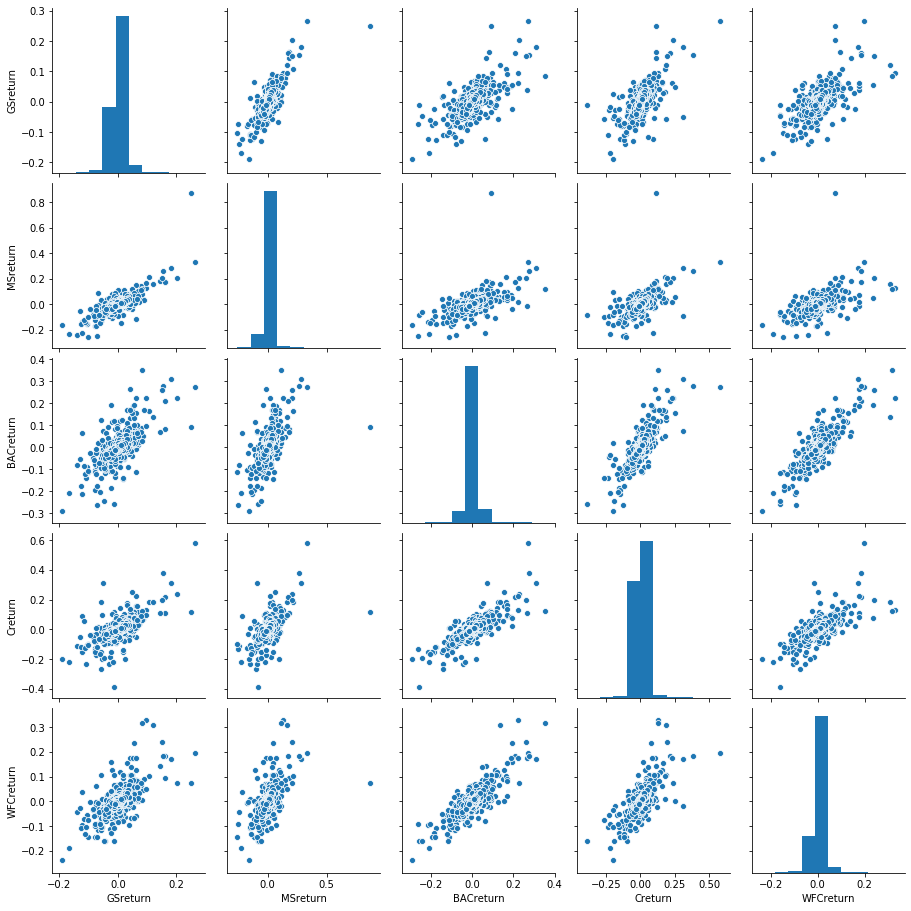

In [25]:
sns.pairplot(returns)

# As we can see from the above pair plots we can infer that Morgan Stanley bank stock stands out and it has highest returns over the time period.

# Checkout more about the behaviour of Citigroup.

In [26]:
bank_stocks.xs(key='C',axis=1,level='Bank Ticker').describe()

Stock Info,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,147.422630,143.622424,145.685157,145.388713,2.842986e+07,120.403789
std,178.963279,175.978481,177.553275,177.398413,2.829885e+07,141.335989
min,10.700000,9.700000,10.200000,10.200000,6.328000e+05,9.048056
25%,40.099998,38.799999,39.500000,39.400002,1.007370e+07,34.950329
50%,49.919998,48.889999,49.430000,49.389999,2.183960e+07,43.909672
75%,204.600006,190.399994,197.399994,196.899994,3.869110e+07,169.641327
max,570.000000,555.500000,566.000000,564.099976,3.772638e+08,452.458160


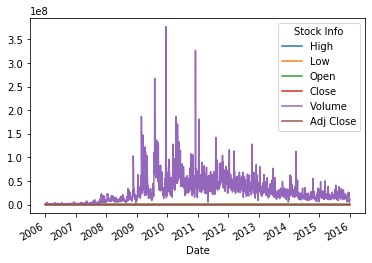

In [27]:
bank_stocks.xs(key='C',axis=1,level='Bank Ticker').plot()

In [28]:
bank_stocks.xs(key='C',axis=1,level='Bank Ticker').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


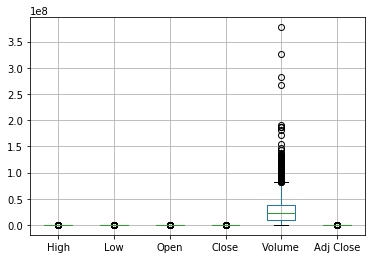

In [29]:
bank_stocks.xs(key='C',axis=1,level='Bank Ticker').boxplot()

# Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

# For this we can use idmax and idmin function which is able to find to the first occurence of maximum/minimum over requested axis in a dataframe.

In [30]:
returns.idxmin()

GSreturn    2009-01-20
MSreturn    2008-10-09
BACreturn   2009-01-20
Creturn     2009-02-27
WFCreturn   2009-01-20
dtype: datetime64[ns]

In [31]:
returns.idxmax()

GSreturn    2008-11-24
MSreturn    2008-10-13
BACreturn   2009-04-09
Creturn     2008-11-24
WFCreturn   2008-07-16
dtype: datetime64[ns]

# From the above results we can see that Goldman Sachs,Bank of America,Wells Fargo share price dropped significantly on 20th Jan 2009.This was the day when Barak Obama was elected as president of America.

# You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?

# In november 2008 Citigroup announced plans for about 52,000 new job cuts, on top of 23,000 cuts already made during 2008 in a huge job cull resulting from four quarters of consecutive losses and reports that it was unlikely to be in profit again before 2010. The same day on Wall Street markets responded, with shares falling.That is why the stoc started falling from Nobember 2008.The stock did some recovery as result of Citigroup announced that the U.S. government would take a 36% equity stake in the company.


# Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [32]:
returns.describe()

,GSreturn,MSreturn,BACreturn,Creturn,WFCreturn
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000452,0.000423,0.000258,-0.000157,0.000657
std,0.025390,0.037819,0.036647,0.038672,0.030238
min,-0.189596,-0.258929,-0.289694,-0.390244,-0.238223
25%,-0.010185,-0.012397,-0.011367,-0.011182,-0.008696
50%,0.000368,0.000254,0.000000,-0.000210,0.000000
75%,0.011004,0.012504,0.010751,0.010751,0.008844
max,0.264678,0.869835,0.352691,0.578249,0.327645


In [33]:
idx = pd.IndexSlice
returns.loc[idx['2015-01-01':'2015-12-31'],:].std()

GSreturn     0.014046
MSreturn     0.016249
BACreturn    0.016163
Creturn      0.015289
WFCreturn    0.012591
dtype: float64

# pd.IndexSlice  function will let you select index  for a data frame

# Create a distplot using seaborn of the 2015 returns for Morgan Stanley\

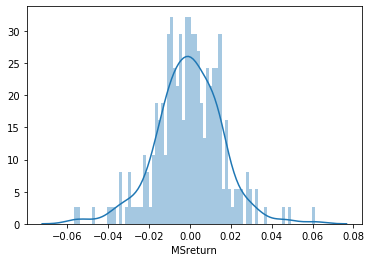

In [36]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MSreturn'].dropna(),bins=80)

# Create a distplot using seaborn of the 2008 returns for CitiGroup

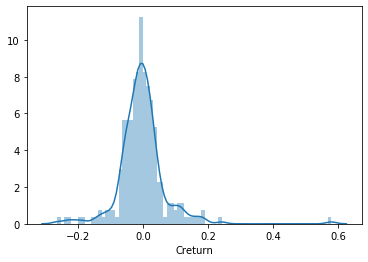

In [39]:
sns.distplot(returns['2008-01-01':'2008-12-31']['Creturn'].dropna(),bins=80)

# Create a line plot showing Close price for each bank for the entire index of time.

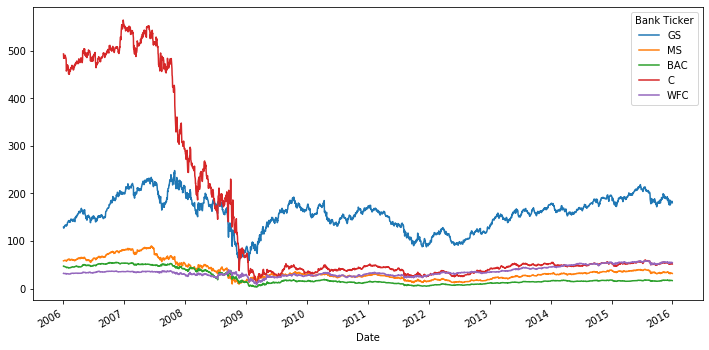

In [40]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

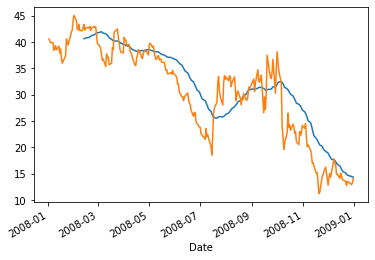

In [53]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label="30 Day Avg")
BAC['Close']['2008-01-01':'2009-01-01'].plot(label="BAC Close")

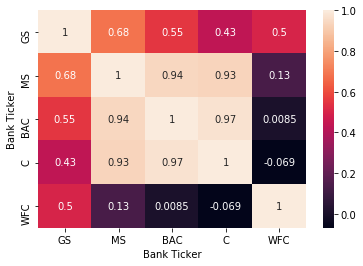

In [54]:
sns.heatmap(bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True)

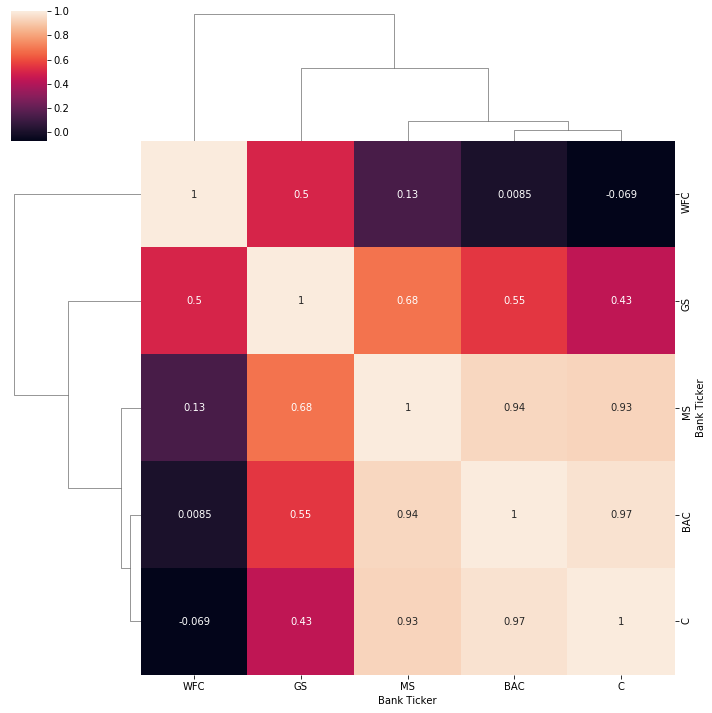

In [55]:
sns.clustermap(bank_stocks.xs(key="Close",axis=1,level="Stock Info").corr(),annot=True)